In [1]:
import sys
import os
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
current_dir = os.getcwd()
print(f"The current working directory is {current_dir}")
if os.path.basename(current_dir) == 'scripts':
    project_root = os.path.dirname(current_dir)
    os.chdir(project_root)
    print(f"Changed working directory to {project_root}")
    sys.path.append(current_dir)
else:
    scripts_path = os.path.join(current_dir, 'scripts')
    if os.path.exists(scripts_path):
        sys.path.append(scripts_path)

The current working directory is c:\Users\ourbarn\Desktop\Customer-Experience-Analysis-for-Fintech-Apps\scripts
Changed working directory to c:\Users\ourbarn\Desktop\Customer-Experience-Analysis-for-Fintech-Apps


In [3]:
try:
    from preprocessing import ReviewPreprocessor 
    try:   
        from scraper import main as run_scraper
    except ImportError:
        from scripts.scraper import main as run_scraper
except Exception as e:
    sys.path.append(os.getcwd())
    from preprocessing import ReviewPreprocessor
    from scraper import main as run_scraper

In [4]:
print(" 🚀🚀 Starting Scraper")
raw_df = run_scraper()

print("✅ Scraping Finished")
display(raw_df.head())

 🚀🚀 Starting Scraper
🔍 🔍 Starting Google Play Store Review Scraper...

[1/2] Fetching app information...

CBE: Commercial bank of Ethiopia
APP ID: com.combanketh.mobilebanking
Current Rating: 4.3195715
Total Ratings: 38866
Total Reviews: 8337

Abyssinia: Bank of Abyssinia
APP ID: com.boa.boaMobileBanking
Current Rating: 4.171384
Total Ratings: 6365
Total Reviews: 1219

Dashen: Dashen Bank
APP ID: com.dashen.dashensuperapp
Current Rating: 4.168704
Total Ratings: 3915
Total Reviews: 772

📁App information saved to data/raw/app_info.csv

[2/2] 📱🕷️⭐Scraping reviews...


Banks:   0%|          | 0/3 [00:00<?, ?it/s]


🔍 Scraping reviews for com.combanketh.mobilebanking...
✅ Successfully fetched 400 reviews for com.combanketh.mobilebanking
✅Collected 400 reviews for Commercial bank of Ethiopia


Banks:  33%|███▎      | 1/3 [00:03<00:07,  3.76s/it]


🔍 Scraping reviews for com.boa.boaMobileBanking...
✅ Successfully fetched 400 reviews for com.boa.boaMobileBanking
✅Collected 400 reviews for Bank of Abyssinia


Banks:  67%|██████▋   | 2/3 [00:08<00:04,  4.10s/it]


🔍 Scraping reviews for com.dashen.dashensuperapp...
✅ Successfully fetched 400 reviews for com.dashen.dashensuperapp
✅Collected 400 reviews for Dashen Bank


Banks: 100%|██████████| 3/3 [00:12<00:00,  4.07s/it]



✅Scraping Complete!

Total reviews collected: 1200
Reviews per bank:
Reviews per bank:
 Commercial bank of Ethiopia has 400 reviews.
 Bank of Abyssinia has 400 reviews.
 Dashen Bank has 400 reviews.

📁Reviews data saved to data/raw/reviews_raw.csv

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Sample Reviews
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Commercial bank of Ethiopia:
------------------------------------------------------------

 Rating: ⭐⭐⭐⭐⭐ (5/5)
Review: good app...
Date: 2025-11-28 11:33:17

Bank of Abyssinia:
------------------------------------------------------------

 Rating: ⭐⭐⭐⭐⭐ (5/5)
Review: good jop...
Date: 2025-11-27 13:19:25

Dashen Bank:
------------------------------------------------------------

 Rating: ⭐⭐⭐⭐⭐ (5/5)
Review: its fast and easy to communicate to the app and its available all area keep it up.i will make Happy for this application thank you dashen bank for your effort,commitment and dedication. i appricated y

,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_id,source
0,cb37b096-e071-4f0f-a8fd-067b7d71706d,CBE ይለያል።,5,2025-11-29 17:22:32,Kamil Tesfaye,0,None,CBE,Commercial bank of Ethiopia,5.2.1,Google Play
1,70f504ff-daed-40d9-9c89-cc49a95ef659,it's special for me,5,2025-11-29 15:54:14,Abde Semed,0,None,CBE,Commercial bank of Ethiopia,5.2.1,Google Play
2,28f229b5-0026-41b9-a1eb-b76e74736f63,Make it user friendly.,2,2025-11-29 08:17:45,TOMIZ Creativity,0,None,CBE,Commercial bank of Ethiopia,None,Google Play
3,68d8daea-db47-4e23-a692-755173dea983,maaliif daddafee install gaafata,3,2025-11-28 13:36:32,Tesfaye Abdi,0,None,CBE,Commercial bank of Ethiopia,5.2.1,Google Play
4,ee0dbb0e-4eb0-47b5-9874-c37877493f99,good app,5,2025-11-28 11:33:17,Betelhem Kebede,0,None,CBE,Commercial bank of Ethiopia,None,Google Play


In [5]:
raw_df.columns

Index(['review_id', 'review_text', 'rating', 'review_date', 'user_name',
       'thumbs_up', 'reply_content', 'bank_code', 'bank_name', 'app_id',
       'source'],
      dtype='object')

In [6]:
# Initialize Preprocessor
preprocessor = ReviewPreprocessor()

# Run the process
success = preprocessor.process()

if success:
    print("\n✅ Preprocessing Finished successfully")
    df = preprocessor.df
else:
    print("❌ Preprocessing Failed ")

STARTING DATA PREPROCESSING
Loading raw data...
Loaded 1200 reviews

[1/6] Checking for missing data...

Missing values:
  reply_content: 1198 (99.83%)
  app_id: 277 (23.08%)

[2/6] Handling missing values...

[2/6] Handling duplicate values...
Removed 157 rows with duplicate critical values

[3/6] Normalizing dates...
Date range: 2024-10-03 to 2025-11-29

[4/6] Cleaning text...

[5/6] Validating ratings...
All ratings are valid (1-5)

[6/6] Preparing final output...
Final dataset: 1043 reviews

Saving processed data...
Data saved to: data/processed/reviews_processed.csv

PREPROCESSING REPORT

Original records: 1200
Records with missing critical data: 0
Empty reviews removed: 0
Invalid ratings removed: 0
Final records: 1043

Data retention rate: 86.92%
Data error rate: 13.08%
⚠ Data quality: NEEDS ATTENTION (>10% errors)

Reviews per bank:
  Bank of Abyssinia: 362
  Dashen Bank: 346
  Commercial bank of Ethiopia: 335

Rating distribution:
  ⭐⭐⭐⭐⭐: 587 (56.3%)
  ⭐⭐⭐⭐: 83 (8.0%)
  ⭐⭐⭐: 6

Visualizations

C:\Users\ourbarn\AppData\Local\Temp\ipykernel_6340\307724874.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')
C:\Users\ourbarn\AppData\Local\Temp\ipykernel_6340\307724874.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bank_code', data=df, palette='Set2')


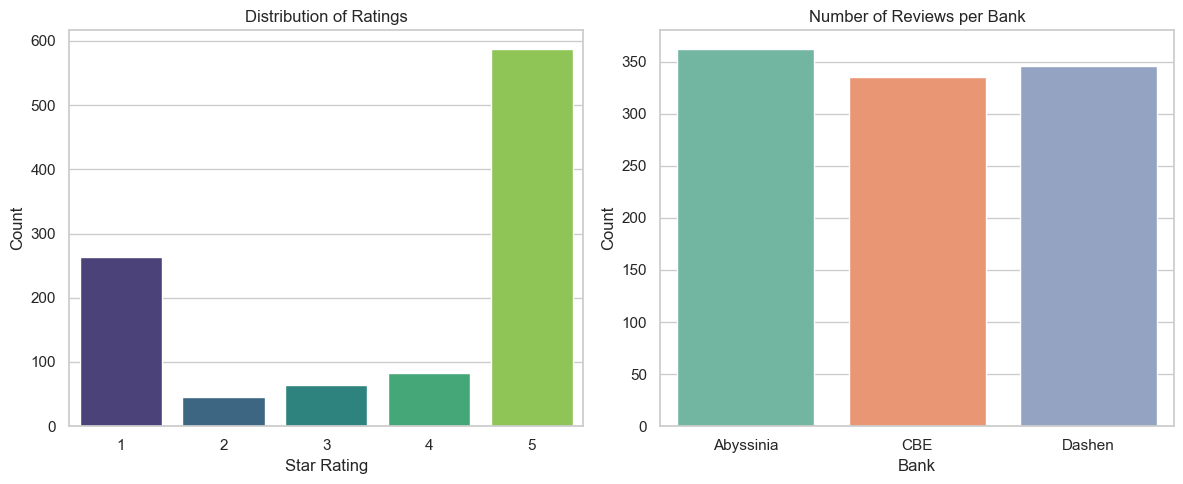

In [7]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# 1. Ratings Distribution
plt.subplot(1, 2, 1)
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')

# 2. Reviews per Bank
plt.subplot(1, 2, 2)
sns.countplot(x='bank_code', data=df, palette='Set2')
plt.title('Number of Reviews per Bank')
plt.xlabel('Bank')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

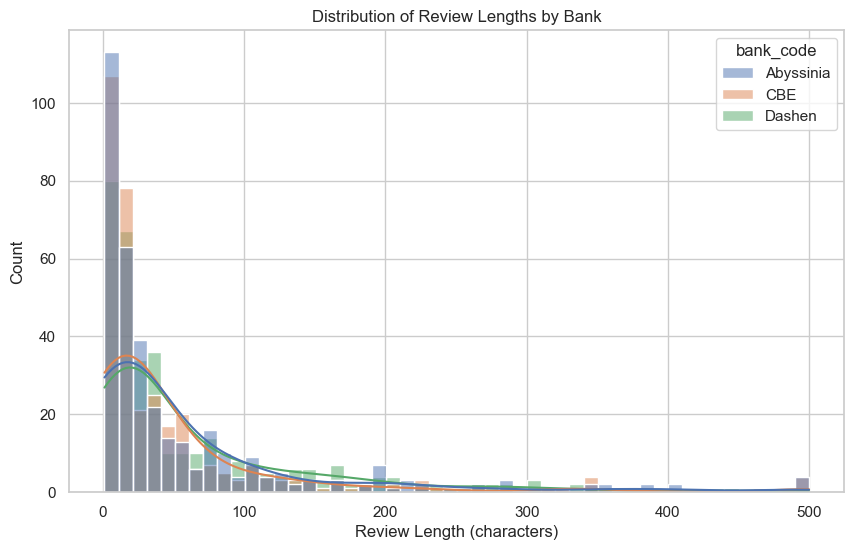

In [ ]:
# 3. Review Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='review_date', bins=50, kde=True, hue='rating')
plt.title('Time series distribution of Ratings')
plt.xlabel('Review date')
plt.ylabel('Rating')
plt.show()

In [ ]:
# 3. Review Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', bins=50, kde=True, hue='bank_code')
plt.title('Distribution of Review Lengths by Bank')
plt.xlabel('Review Length (characters)')
plt.ylabel('Count')
plt.show()

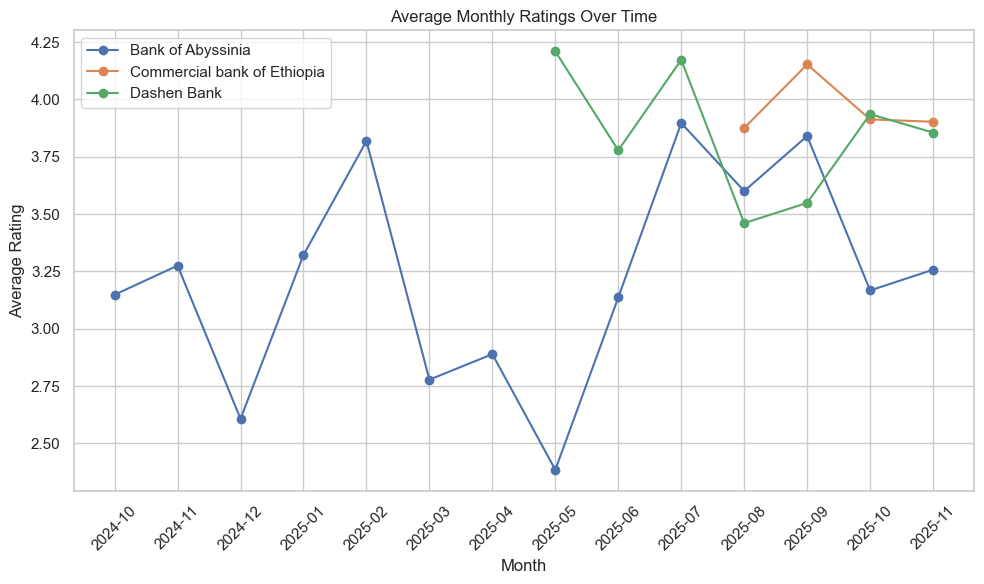

In [11]:
plt.figure(figsize=(10, 6))
for bank in df['bank_name'].unique():
    bank_data = df[df['bank_name'] == bank]
    # Resample by month and calculate average rating
    monthly_avg = bank_data.groupby(pd.to_datetime(bank_data['review_date']).dt.to_period('M'))['rating'].mean()
    plt.plot(monthly_avg.index.astype(str), monthly_avg.values, label=bank, marker='o')

plt.title('Average Monthly Ratings Over Time')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()